In [59]:
# import library

import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Dropout

In [8]:
#  dataframe
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
# buang kolom
df = df.drop(columns='Id')


In [14]:
# one hot encoding
category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [16]:
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [23]:
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [24]:
# Pisahkan atribut dan label
X = dataset[:, 0:4]
y = dataset[:, 4:7]

In [25]:
# Normalisasi
min_max_scale = preprocessing.MinMaxScaler()
X_scale = min_max_scale.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3)

In [64]:
model = Sequential([Dense(64, activation='relu', input_shape=(4,)),
                    Dense(64, activation='relu'),
                    Dropout(0.2),
                    Dense(3, activation='softmax')])

In [65]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [66]:
# callback
class myCallback(tf.keras.callbacks.Callback) :
  
  def on_epoch_end(self, epoch, logs={}) :
    if logs.get('accuracy') > 0.94 :
      print('\nAkurasi sudah mencapai 94%!')
      self.model.stop_training = True

callback = myCallback()

In [67]:
history = model.fit(X_train, y_train, epochs=150, callbacks=callback)

Epoch 1/150
4/4 [==============================] - 1s 4ms/step - loss: 1.0640 - accuracy: 0.3177
Epoch 2/150
4/4 [==============================] - 0s 3ms/step - loss: 1.0180 - accuracy: 0.3629
Epoch 3/150
4/4 [==============================] - 0s 4ms/step - loss: 0.9944 - accuracy: 0.3833
Epoch 4/150
4/4 [==============================] - 0s 3ms/step - loss: 0.9744 - accuracy: 0.5363
Epoch 5/150
4/4 [==============================] - 0s 5ms/step - loss: 0.9322 - accuracy: 0.6084
Epoch 6/150
4/4 [==============================] - 0s 4ms/step - loss: 0.9274 - accuracy: 0.5591
Epoch 7/150
4/4 [==============================] - 0s 5ms/step - loss: 0.8939 - accuracy: 0.6549
Epoch 8/150
4/4 [==============================] - 0s 5ms/step - loss: 0.8815 - accuracy: 0.6160
Epoch 9/150
4/4 [==============================] - 0s 5ms/step - loss: 0.8453 - accuracy: 0.6653
Epoch 10/150
4/4 [==============================] - 0s 6ms/step - loss: 0.8152 - accuracy: 0.6840
Epoch 11/150
4/4 [===========

In [68]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.3272 - accuracy: 0.9333


[0.32717686891555786, 0.9333333373069763]

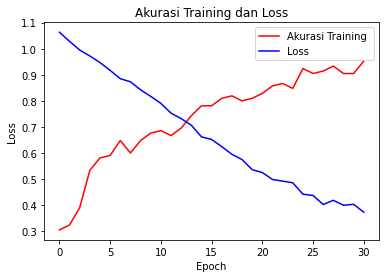

<Figure size 432x288 with 0 Axes>

In [70]:
# Plot accuracy
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Akurasi Training ')                 
plt.plot(epochs, loss, 'b', label='Loss')
plt.title('Akurasi Training dan Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()                                                                      
plt.show()